In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

In [36]:
data = pd.read_csv("lilacs_tcr.motifs.for_net.csv")

In [38]:
pattern = r'\(([^,]+),\s*([^)]+)\)'

data["RankedTargetGenes"] = None
data["T10RankedTargetGenes"] = None

for index, row in data.iterrows():
    data.at[index, "RankedTargetGenes"] = re.findall(pattern, row["TargetGenes"])

for index, row in data.iterrows():
    data.at[index, "RankedTargetGenes"]  = sorted(row["RankedTargetGenes"], key=lambda x: x[1], reverse=True)

for index, row in data.iterrows():
    data.at[index, "T10RankedTargetGenes"]  = row["RankedTargetGenes"][0:9]
    
data

,Set,NES,MotifSimilarityQvalue,TargetGenes,RankAtMax,RankedTargetGenes,T10RankedTargetGenes
0,STAT1,5.154483,4.611200e-06,"[('DDX60', 2.3019614757182603), ('ITGB1', 1.48...",4954,"[('IFI44L', 8.451000121177495), ('IFI6', 8.002...","[('IFI44L', 8.451000121177495), ('IFI6', 8.002..."
1,IRF1,4.418724,0.000000e+00,"[('ITGA4', 1.2395481674548747), ('ITGB2', 0.86...",4912,"[('PREX1', 3.2060675197697117), ('PIK3R5', 1.4...","[('PREX1', 3.2060675197697117), ('PIK3R5', 1.4..."
2,TBX21,3.494062,0.000000e+00,"[('SPON2', 3.678727044984261), ('ITGAM', 1.602...",4911,"[('CTSW', 7.089860608599679), ('ZEB2', 6.60871...","[('CTSW', 7.089860608599679), ('ZEB2', 6.60871..."
3,NFATC2,3.944039,4.767530e-06,"[('IKZF1', 2.1283062213006776), ('ATP2B4', 0.2...",4623,"[('IKZF1', 2.1283062213006776), ('NONO', 1.959...","[('IKZF1', 2.1283062213006776), ('NONO', 1.959..."
4,EOMES,3.525039,1.417840e-08,"[('PAM', 1.804066971717437), ('GZMK', 6.280118...",4584,"[('GZMK', 6.280118124445158), ('DUSP2', 4.5909...","[('GZMK', 6.280118124445158), ('DUSP2', 4.5909..."
5,JUN,3.515065,0.000000e+00,"[('ZFP36L2', 1.6254534140115795), ('PPP1R15A',...",4510,"[('NFKBIA', 5.1447579609224565), ('DDX5', 4.07...","[('NFKBIA', 5.1447579609224565), ('DDX5', 4.07..."
6,JUNB,5.205581,2.885580e-13,"[('DUSP1', 3.838767366854516), ('DDX5', 2.0066...",3958,"[('JUN', 7.397147204031786), ('FOS', 6.5631208...","[('JUN', 7.397147204031786), ('FOS', 6.5631208..."
7,MYBL1,3.605449,3.728910e-07,"[('KLRF1', 0.2985123268473494), ('PRR5L', 0.71...",3796,"[('GZMH', 1.7665462632728115), ('SYTL2', 1.450...","[('GZMH', 1.7665462632728115), ('SYTL2', 1.450..."
8,IKZF2,3.013986,6.869890e-06,"[('TTN', 0.928174910712967), ('EIF3A', 0.95521...",3651,"[('FOXP3', 5.267146835835945), ('RTKN2', 3.707...","[('FOXP3', 5.267146835835945), ('RTKN2', 3.707..."
9,FOS,4.920994,0.000000e+00,"[('TNFAIP3', 3.039528614354357), ('TAGAP', 5.7...",3106,"[('JUNB', 8.083426637571309), ('KLF6', 8.03824...","[('JUNB', 8.083426637571309), ('KLF6', 8.03824..."


In [39]:
data["Genes"] = None

pattern = r"'"

for index, row in data.iterrows():
    data.at[index, "Genes"] = [item[0] for item in row["T10RankedTargetGenes"]]
    
for index, row in data.iterrows():
    data.at[index, "Genes"] = [re.sub(pattern, '', item) for item in row["Genes"]]

In [40]:
data

,Set,NES,MotifSimilarityQvalue,TargetGenes,RankAtMax,RankedTargetGenes,T10RankedTargetGenes,Genes
0,STAT1,5.154483,4.611200e-06,"[('DDX60', 2.3019614757182603), ('ITGB1', 1.48...",4954,"[('IFI44L', 8.451000121177495), ('IFI6', 8.002...","[('IFI44L', 8.451000121177495), ('IFI6', 8.002...","[IFI44L, IFI6, MX1, PARP9, IFIT1, ISG15, SMCHD..."
1,IRF1,4.418724,0.000000e+00,"[('ITGA4', 1.2395481674548747), ('ITGB2', 0.86...",4912,"[('PREX1', 3.2060675197697117), ('PIK3R5', 1.4...","[('PREX1', 3.2060675197697117), ('PIK3R5', 1.4...","[PREX1, PIK3R5, ITGA4, SUN2, GZMA, ZNF683, SLA..."
2,TBX21,3.494062,0.000000e+00,"[('SPON2', 3.678727044984261), ('ITGAM', 1.602...",4911,"[('CTSW', 7.089860608599679), ('ZEB2', 6.60871...","[('CTSW', 7.089860608599679), ('ZEB2', 6.60871...","[CTSW, ZEB2, KLRD1, SPN, LCP1, C1orf21, ABI3, ..."
3,NFATC2,3.944039,4.767530e-06,"[('IKZF1', 2.1283062213006776), ('ATP2B4', 0.2...",4623,"[('IKZF1', 2.1283062213006776), ('NONO', 1.959...","[('IKZF1', 2.1283062213006776), ('NONO', 1.959...","[IKZF1, NONO, ITGAL, NFATC2, CX3CR1, SASH3, IL..."
4,EOMES,3.525039,1.417840e-08,"[('PAM', 1.804066971717437), ('GZMK', 6.280118...",4584,"[('GZMK', 6.280118124445158), ('DUSP2', 4.5909...","[('GZMK', 6.280118124445158), ('DUSP2', 4.5909...","[GZMK, DUSP2, DENND2D, IL2RB, CMC1, GZMH, CCL4..."
5,JUN,3.515065,0.000000e+00,"[('ZFP36L2', 1.6254534140115795), ('PPP1R15A',...",4510,"[('NFKBIA', 5.1447579609224565), ('DDX5', 4.07...","[('NFKBIA', 5.1447579609224565), ('DDX5', 4.07...","[NFKBIA, DDX5, MAPRE2, FOS, PPP1R15A, ZFP36L2,..."
6,JUNB,5.205581,2.885580e-13,"[('DUSP1', 3.838767366854516), ('DDX5', 2.0066...",3958,"[('JUN', 7.397147204031786), ('FOS', 6.5631208...","[('JUN', 7.397147204031786), ('FOS', 6.5631208...","[JUN, FOS, DUSP1, TNFAIP3, NR4A2, ZFP36L2, BTG..."
7,MYBL1,3.605449,3.728910e-07,"[('KLRF1', 0.2985123268473494), ('PRR5L', 0.71...",3796,"[('GZMH', 1.7665462632728115), ('SYTL2', 1.450...","[('GZMH', 1.7665462632728115), ('SYTL2', 1.450...","[GZMH, SYTL2, CD8A, ATP8A1, AGAP1, FCRL3, USP2..."
8,IKZF2,3.013986,6.869890e-06,"[('TTN', 0.928174910712967), ('EIF3A', 0.95521...",3651,"[('FOXP3', 5.267146835835945), ('RTKN2', 3.707...","[('FOXP3', 5.267146835835945), ('RTKN2', 3.707...","[FOXP3, RTKN2, NEAT1, IL2RA, EZR, EIF3A, CCDC1..."
9,FOS,4.920994,0.000000e+00,"[('TNFAIP3', 3.039528614354357), ('TAGAP', 5.7...",3106,"[('JUNB', 8.083426637571309), ('KLF6', 8.03824...","[('JUNB', 8.083426637571309), ('KLF6', 8.03824...","[JUNB, KLF6, TAGAP, NFKBIA, ZFP36L2, TNFAIP3, ..."


In [12]:
gene_sets = data.set_index('Set')['Genes'].to_dict()
enrichment_scores = data.set_index('Set')['NES'].to_dict()

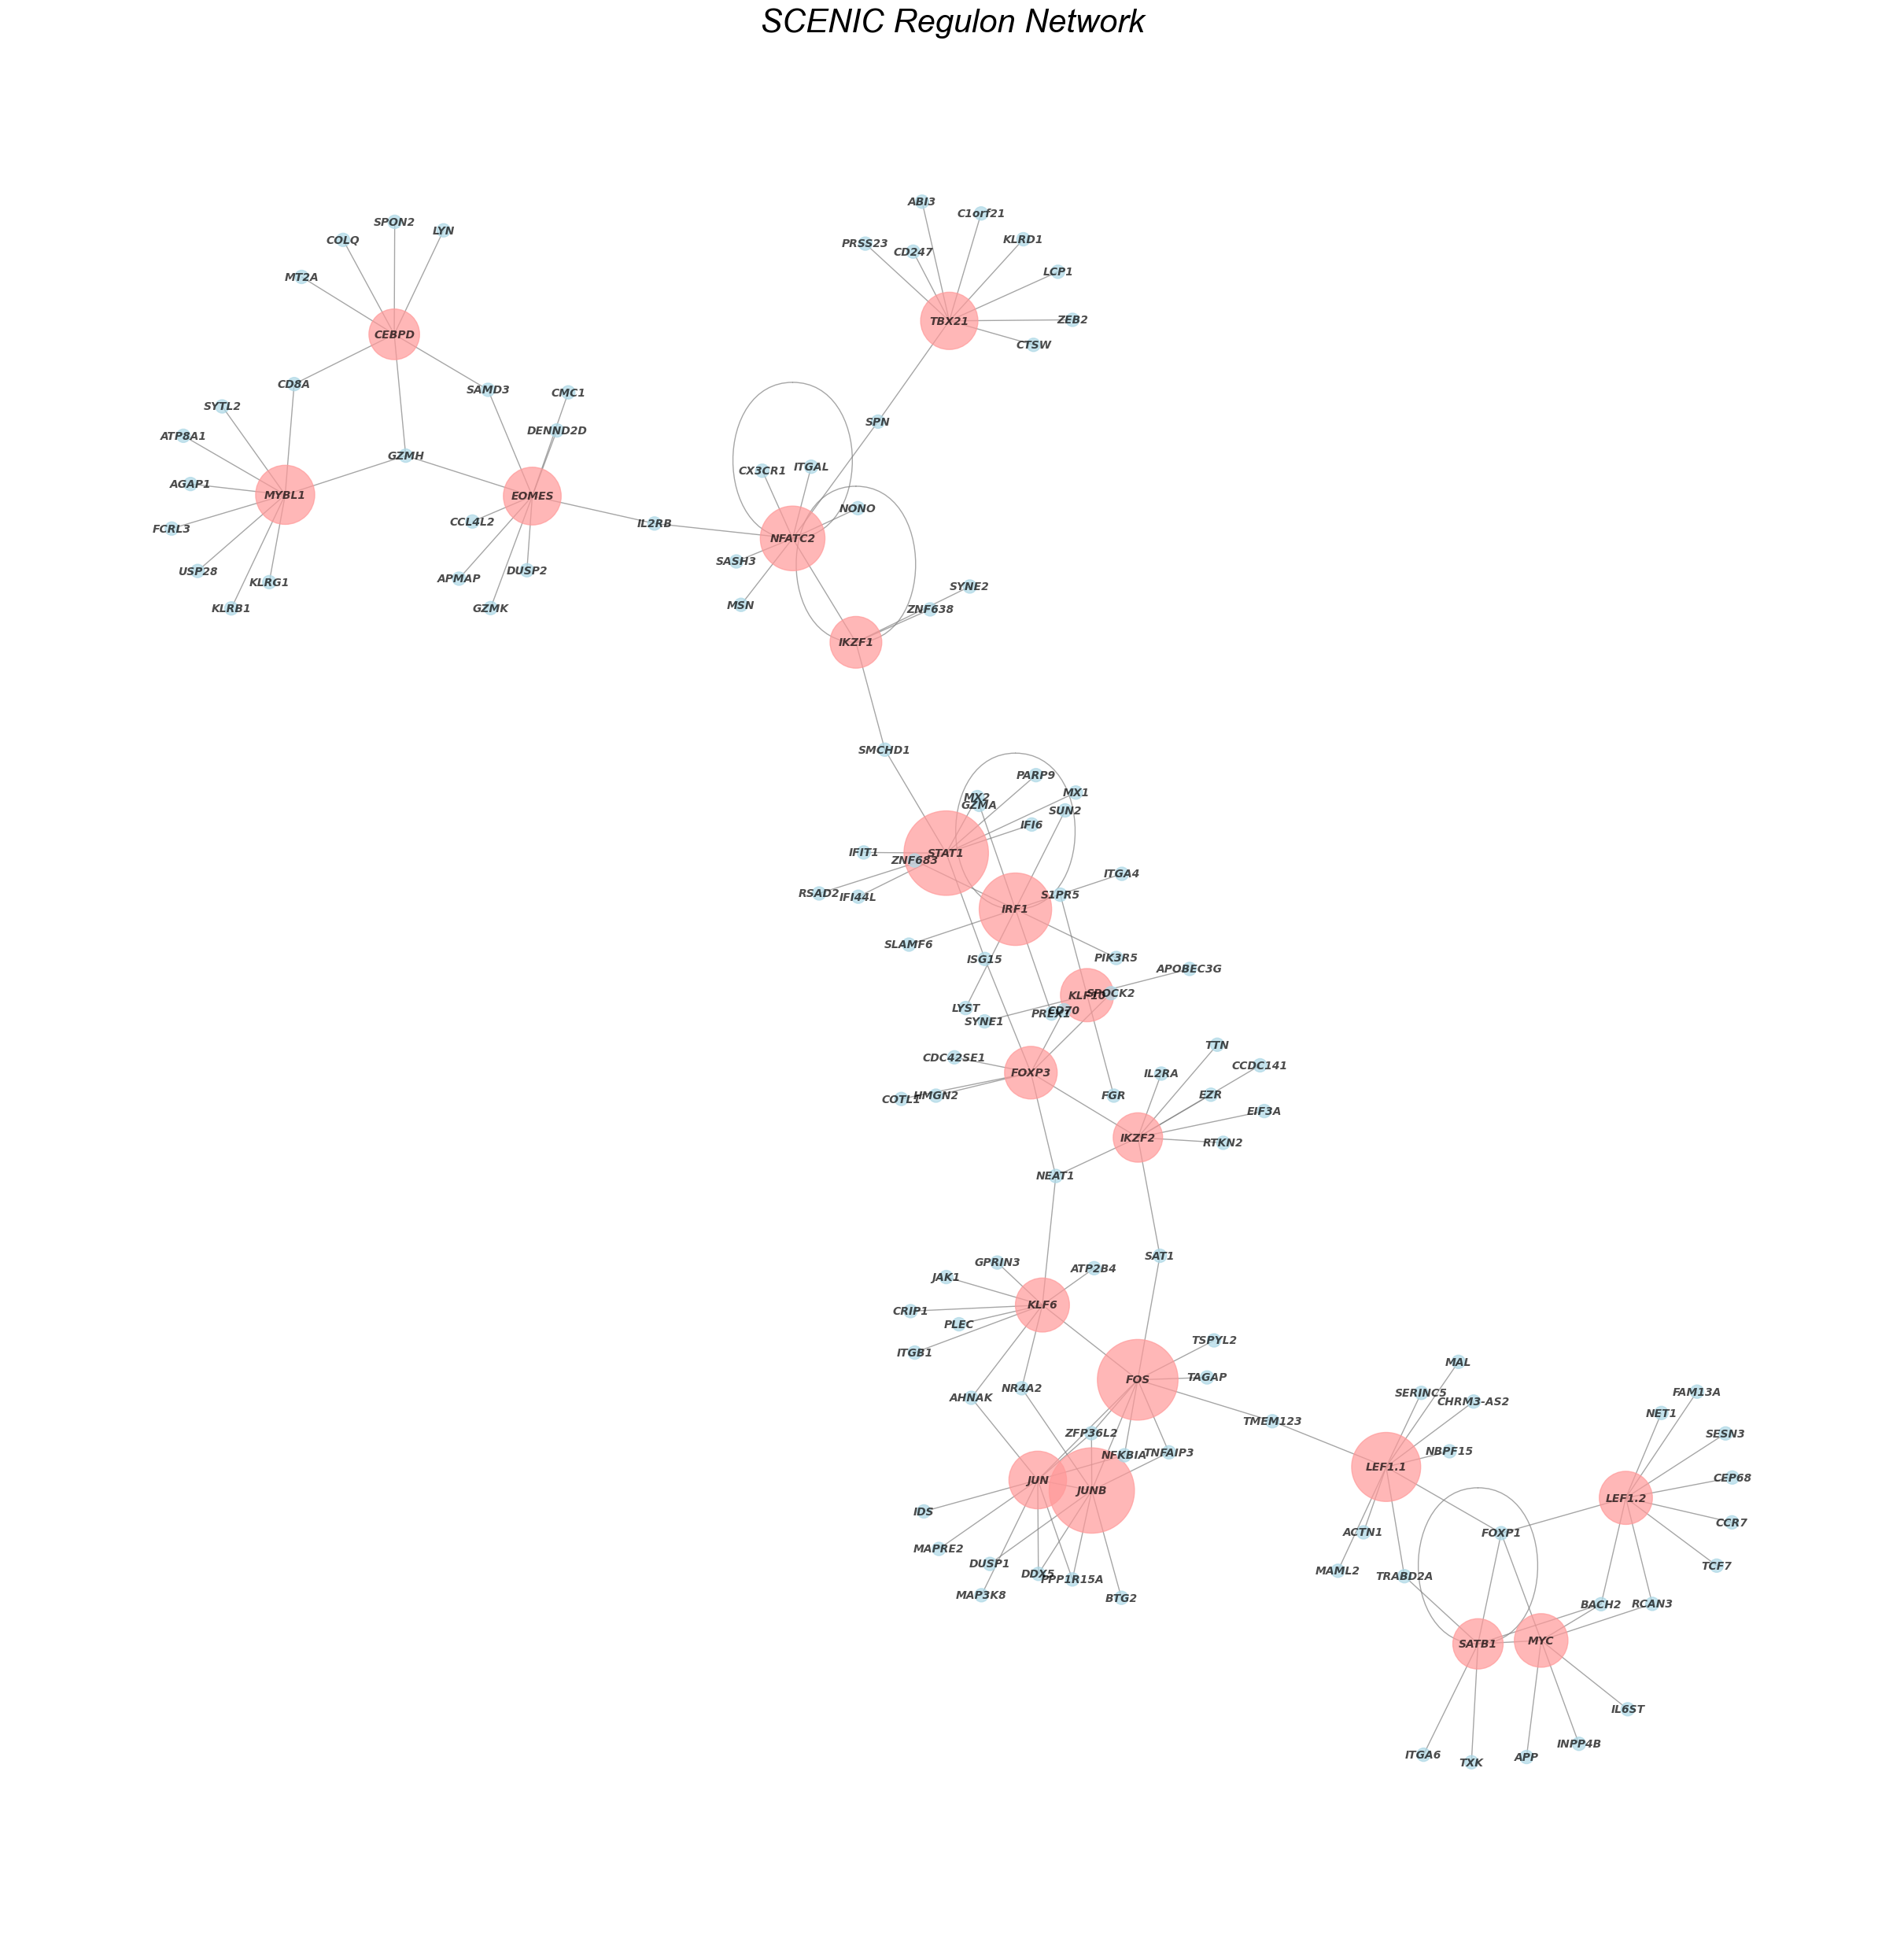

In [44]:
#Overall
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.style': 'italic'})

# Initialize the graph
G = nx.Graph()

# Add gene set nodes with enrichment scores as attributes
for gene_set, score in enrichment_scores.items():
   G.add_node(gene_set, type='gene_set', score=score)

# Add gene nodes and connect them to their respective gene sets
for gene_set, genes in gene_sets.items():
   for gene in genes:
       if gene not in G:
           G.add_node(gene, type='gene')
       G.add_edge(gene_set, gene)

# Define the layout
pos = nx.kamada_kawai_layout(G)

# Extract node types and sizes
node_colors = []
node_sizes = []
for node in G.nodes(data=True):
   if node[1]['type'] == 'gene_set':
       node_colors.append('#ff9999')  # pastel red
       # Scale the size based on enrichment score
       node_sizes.append((node[1]['score']*15)**2)
   else:
       node_colors.append('#add8e6')  # pastel blue
       node_sizes.append(150)  # fixed size for genes

# Draw the network
plt.figure(figsize=(24, 24))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
       edge_color='gray', font_size=10, font_weight='bold', alpha=0.7)
plt.title('SCENIC Regulon Network')
plt.show()


In [22]:
abbr_gene_sets = dict((k, gene_sets[k]) for k in ('LEF1.2', 'SATB1', 'MYC'))
abbr_enrichment_scores = dict((k, enrichment_scores[k]) for k in ('LEF1.2', 'SATB1', 'MYC'))

abbr_gene_sets['LEF1'] = abbr_gene_sets.pop('LEF1.2')
abbr_enrichment_scores['LEF1'] = abbr_enrichment_scores.pop('LEF1.2')

gene_sets = abbr_gene_sets
enrichment_scores = abbr_enrichment_scores

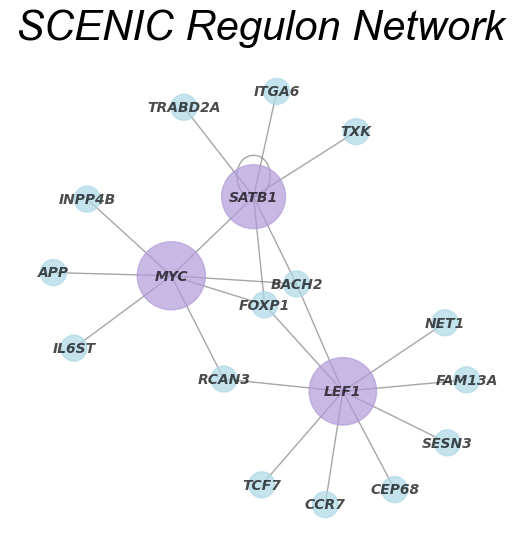

In [33]:
# Just BACH2 regulons

# Initialize the graph
G = nx.Graph()

# Add gene set nodes with enrichment scores as attributes
for gene_set, score in enrichment_scores.items():
   G.add_node(gene_set, type='gene_set', score=score)

# Add gene nodes and connect them to their respective gene sets
for gene_set, genes in gene_sets.items():
   for gene in genes:
       if gene not in G:
           G.add_node(gene, type='gene')
       G.add_edge(gene_set, gene)

# Define the layout
pos = nx.kamada_kawai_layout(G)

# Extract node types and sizes
node_colors = []
node_sizes = []

for node in G.nodes(data=True):
   if node[1]['type'] == 'gene_set':
       node_colors.append('#b19cd9')  # pastel red
       # Scale the size based on enrichment score
       node_sizes.append((node[1]['score']*15)**2)
   else:
       node_colors.append('#add8e6')  # pastel blue
       node_sizes.append(350)  # fixed size for genes
    
# Draw the network
plt.figure(figsize=(5, 5))

nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=node_sizes,
       edge_color='gray',
        font_size=10,
        font_weight='bold', alpha=0.7)

#nx.draw_networkx(G.subgraph('BACH2'), pos=pos, font_size=10, font_weight='bold', node_color='red', font_color='black', node_size=400)

plt.title('SCENIC Regulon Network')
plt.show()